# Final Assignment of Management and Analysis of Physics Dataset

## Data Management
***

#### Fun Exercise

$2 + 1 \to 10 + 01 = 11 \to 3$ <br>
$2 + 5 \to 010 + 101 = 111 \to 7$ <br>
$3 + 7 \to 011 + 111 = 100 \to 4$ <br>
$4 + 5 \to 100 + 101 = 001 \to 1$ <br>
$5 + 9 \to 0101 + 1001 = 1100 \to 12$ <br>
$+$ is the xor operation (digit-wise) of the binary representation

***

## 3. Object Storage

In an object storage system we are mapping objects by name to locations using a hash table.
Imagine we have a system with ten hard disks ($10$ locations). We enumerate the location of a file using an index of the hard disk $[0,\dots,9]$.
Our hash algorithm for placement produces hashes which are distributed uniform over the value space for a flat input key distribution.
We want now to simulate the behaviour of our hash algorithm without the need to actually compute any hash value.
Instead of using real filenames, which we would hash and map using a hash table to a location (as we did in the exercise), we are ‘computing’ a location for ‘any’ file by generating a random number for the location in the range $[0,\dots,9]$ to assign a file location. To place a file in the storage system we use this random location where the file will be stored and consumes space.
            
Assume each disk has $1\,$TB of space, we have $10\,$TB in total.
Place as many files of $10\,$GB size as possible to hard disks choosing random locations until one hard disk is full.
Hint: a hard disk is full once you have stored hundred $10\,$GB files.

1. Write a program in Python, R or using ROOT, which simulates the placement of $10\,$GB files to random locations and account the used space on each hard disk. Once the first hard disk is full, you stop to place files.
Remark: the distribution changes every time if the random generator is not seeded always with the same start value. Nevertheless both ways are accepted!
    1. How many files did you manage to place?
    2. What is the percentage of total used space on all hard disks in the moment the first disk is full?
    
2. Repeat the same task placing $1\,$GB files until the first hard disk is full.
    1. How many files did you manage to place?
    2. What is the percentage of total used space on all hard disks in the moment the first disk is full?
3. Based on this observation: why do you think object storage typically stores fixed size blocks of $4\,$M and not files of GBs size as a whole? (so called block storage approach)
Run the same program for $4\,$M block sizes and demonstrate the benefits
4. Compute the average used space on all hard disks and the standard deviation for the average used space for $10\,$GB and $1\,$GB and $4\,$M files. How is the standard deviation correlated to the block size and why?
If we now repeat such an experiment for many more (thousands) of hard disks, which kind of distribution do you get when you do a histogram of the used space of all hard disks?

In [1]:
import numpy as np
from matplotlib import pyplot as plt

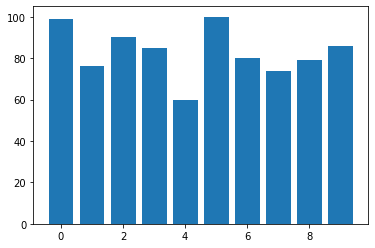

Total number of stored files: 829
Percentage of total used space: 82.90
Average used space (GB):  829.0 	std: 113.61778029868388
Average used space (nfiles):  82.9 	std: 11.361778029868388 	sqrt(avg): 9.10494371207203


In [2]:
np.random.seed(12345)

storage = np.zeros((10))
files_count = 0
block_size = 10
nblock = int(1000/block_size)

i = np.random.randint(0,10,nblock*10)

while np.all(storage < nblock):
    #i = np.random.randint(0,10,1)
    storage[i[files_count]] += 1
    files_count += 1
    
plt.bar([i for i in range(10)], storage)
plt.show()
print('Total number of stored files:',files_count)
print('Percentage of total used space: %.2f'%(files_count/nblock/10*100))
print('Average used space (GB): ',storage.mean()*block_size,'\tstd:',storage.std()*block_size)
print('Average used space (nfiles): ',storage.mean(),'\tstd:',storage.std(),'\tsqrt(avg):',np.sqrt(storage.mean()))

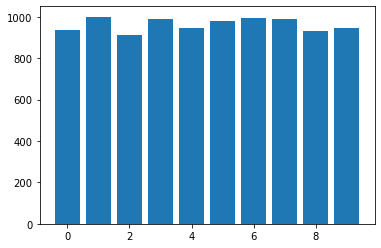

Total number of stored files: 9630
Percentage of total used space: 96.30
Average used space (GB):  963.0 	std: 29.281393409467384
Average used space (nfiles):  963.0 	std: 29.281393409467384 	sqrt(avg): 31.0322412983658


In [3]:
np.random.seed(12345)

storage = np.zeros((10))
files_count = 0
block_size = 1
nblock = int(1000/block_size)

i = np.random.randint(0,10,nblock*10)

while np.all(storage < nblock):
    #i = np.random.randint(0,10,1)
    storage[i[files_count]] += 1
    files_count += 1
    
plt.bar([i for i in range(10)], storage)
plt.show()
print('Total number of stored files:',files_count)
print('Percentage of total used space: %.2f'%(files_count/nblock/10*100))
print('Average used space (GB): ',storage.mean()*block_size,'\tstd:',storage.std()*block_size)
print('Average used space (nfiles): ',storage.mean(),'\tstd:',storage.std(),'\tsqrt(avg):',np.sqrt(storage.mean()))

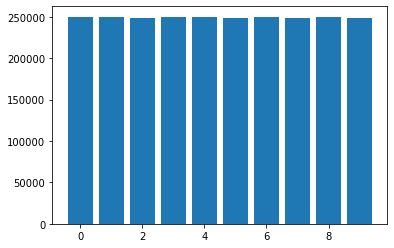

Total number of stored files: 2491278
Percentage of total used space: 99.65
Average used space (GB):  996.5112 	std: 2.1825928067323965
Average used space (nfiles):  249127.8 	std: 545.6482016830992 	sqrt(avg): 499.127037937237


In [4]:
np.random.seed(12345)

storage = np.zeros((10))
files_count = 0
block_size = 0.004
nblock = int(1000/block_size)

i = np.random.randint(0,10,nblock*10)

while np.all(storage < nblock):
    #i = np.random.randint(0,10,1)
    storage[i[files_count]] += 1
    files_count += 1
    
plt.bar([i for i in range(10)], storage)
plt.show()
print('Total number of stored files:',files_count)
print('Percentage of total used space: %.2f'%(files_count/nblock/10*100))
print('Average used space (GB): ',storage.mean()*block_size,'\tstd:',storage.std()*block_size)
print('Average used space (nfiles): ',storage.mean(),'\tstd:',storage.std(),'\tsqrt(avg):',np.sqrt(storage.mean()))

Using smaller blocks allows to have a greater sample and so a better approximation of the distribution (uniform in this case). However this also increases the number of blocks to be read given a certain amount of data. The size of $4\,$M is a tradeoff between these two situations. Moreover the usage of fixed size blocks makes the storage system suitable for applying useful techniques such as striping that can increase the performance and reliability of the system.

The standard deviation of the number of files in a hard disk goes with the square root of the average number of files, so it increases reducing the block size. The standard deviation of the used storage however is derived by the previous one by multiplying it with the blocksize. With respect to the number of blocks the block size decreases linearly, while the standard deviation increases with a $1/2$ power-law, resulting in a reduction of the standard deviation of the used storage per disk.

The shape of the distribution, so the way the sample reproduce the uniform distribution, depends both on the total number of samples (blocks) but also on the ratio between the number of blocks in a single disk and the total number of disks. This is because we have a ceiling in the number of "extraction", i.e. we have to stop when a disk is full. In fact the distribution must be sampled extensively over all the disks before one of them reaches completion, this could be achieved either by decreasing even more the size of the blocks or by increasing the capacity of a single disk.

## 4. REST APIs & Block Chain Technology

1. Assuming the time for POST to be negligible (and hash computation time on the server side to be less than the *Proof of time* of $10\,s$) than the number of transaction per day is constrained by the *Proof of Time* interval of $10\,s$, resulting in $8640$ transaction per day.

2. This function takes a generic input file and returns a 256 bits word (visualized in hexadecimal representation). The funtion is designed in such a way that: it is very difficult to invert, a small change in the input produces a large change in the output, the cases of two element of the domain having the same image are very rare. These features make it suitable for file validation as the file can remain open to the public while the hash is protected and used to check the validity of the file (the advantage resides in the smallness and fixed length of the hash). In the blockchain it plays a key role in enabling the cross-control of the content of a node by the others.

3. I can go through the nodes of the blockchain and for every node calculate the hash of the content and checking it with the one saved in the following node, and so on until the end

4. The GET REST API involves an exchange of a JSON file that has a length approximately proportional to the number of transactions, so the execution time increases with the number of transaction as $\mathcal{O}(n)$. POST on the other hand involves, both for **merit** and **claim**, the exchange of a JSON file of fixed length. As a consequence the execution time is constant with respect to the number of transaction: $\mathcal{O}(1)$.

5. Every block contains the information on a transaction up to the first which contains the intial state of the chain, i.e. the total amount of coins and and their belonging to the *genesis* account. Then the account balances can be reconstructed going through all the history of the transactions saved in the chain.

6. Advantages: easy to use and no need for complex infrastructure (https protocol is widespread and just a web client is needed), JSON is an easy to read format. Disadvantages: not so secure, JSON is not efficient in storing informations.

info su `request` package [here](https://realpython.com/python-requests/#status-codes)

In [20]:
import requests
import time

url = 'https://pansophy.app:8443'

selected_account = 'genesis'
merit = {
        'operation': 'merit',
        'team': 'CCTS',
        'coin': 1,
        'stealfrom': selected_account
        }

claim = {
        'operation':'claim',
        'team':'CCTS'
        }

n_transaction = 1
for i in range(n_transaction):
    state = requests.get(url, verify=False)
    
    if state.status_code != 200:
        print('error occurred during get')
        break
    
    json_state = state.json()
    top = 0
    for account, coin in json_state['accounts'].items():
        if top < coin:
            top = coin
            selected_account = account
    if json_state['accounts'][selected_account] == 1:
        print('blockchain saturated')
        break
    
    merit['stealfrom'] = selected_account
    
    requests.post(url, json=merit, verify=False)
    time.sleep(10)
    requests.post(url, json=claim, verify=False)
    
print(requests.get(url, verify=False).json()['accounts'])

/Users/tommaso/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tommaso/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tommaso/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tommaso/anaconda3/lib/python3.8/s

{'21centurysboys': 1, 'AC Milan': 1, 'Andreas J. Peters': 1, 'BellaFra': 1, 'BellaZio': 1, 'CANE': 999922, 'CCTS': 3, 'FaoTom': 1, 'Fogliame': 1, 'GioC': 1, 'Giovanni': 1, 'GitPush': 1, 'LorenzoDomenichetti': 8, 'LuPi AndAle': 1, 'Oesais': 1, 'PM': 1, 'PaoloMuschio': 1, 'Team1': 1, 'bellaZio': 1, 'genesis': 1, 'whitenoisematters': 50}
